Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, RandomFlip, RandomRotation,Rescaling


In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/dataset/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/CNN_assignment/dataset/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
(train_ds, test_ds) = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred',label_mode='categorical', seed=123,image_size=(img_height,img_width),validation_split=0.1, subset='both')##todo

Found 2239 files belonging to 9 classes.
Using 2016 files for training.
Using 223 files for validation.


In [27]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
plt_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred',label_mode='int', seed=123,image_size=(img_height,img_width))##todo

Found 2239 files belonging to 9 classes.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, labels='inferred',label_mode='categorical', seed=123,image_size=(img_height,img_width))##todo

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes=len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

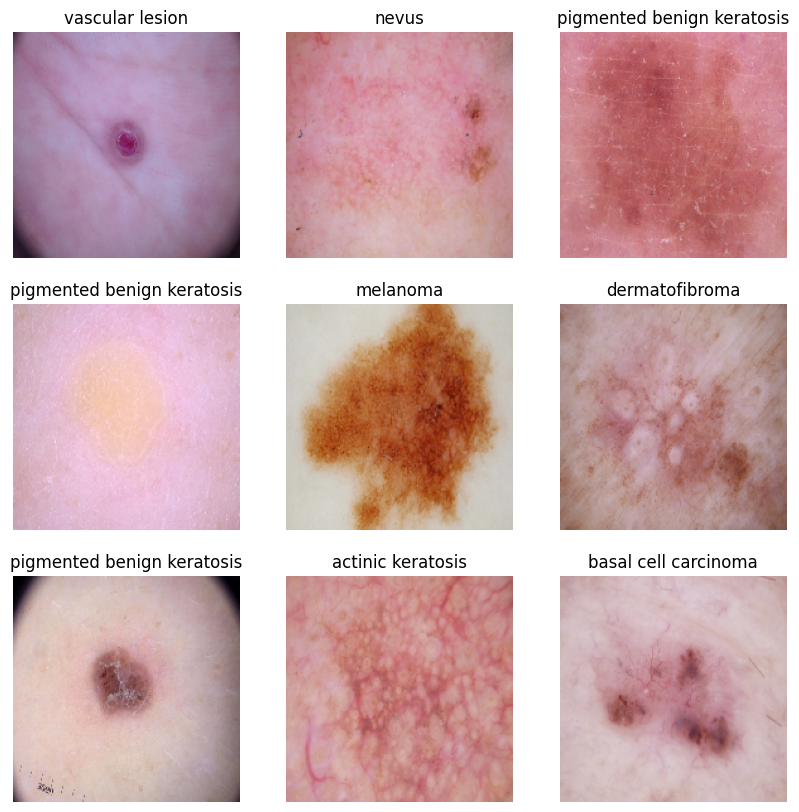

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

plt.figure(figsize=(10, 10))
for images, labels in plt_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
### Your code goes here
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(img_height, img_width,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# for image_batch, labels_batch in train_ds:
#      print(image_batch.shape)
#      print(labels_batch.shape)
#      break

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 180, 180, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                        

### Train the model

In [18]:
epochs = 20
history = model.fit(train_ds,validation_data=test_ds,epochs=epochs)

Epoch 1/20
63/63 [==============================] - 67s 683ms/step - loss: 5.7913 - accuracy: 0.2922 - val_loss: 6.1986 - val_accuracy: 0.1659
Epoch 2/20
63/63 [==============================] - 7s 112ms/step - loss: 1.6795 - accuracy: 0.4365 - val_loss: 7.4710 - val_accuracy: 0.1659
Epoch 3/20
63/63 [==============================] - 8s 130ms/step - loss: 1.3241 - accuracy: 0.5317 - val_loss: 5.9462 - val_accuracy: 0.2018
Epoch 4/20
63/63 [==============================] - 8s 121ms/step - loss: 1.1790 - accuracy: 0.5769 - val_loss: 5.3861 - val_accuracy: 0.2063
Epoch 5/20
63/63 [==============================] - 8s 120ms/step - loss: 1.0533 - accuracy: 0.6324 - val_loss: 3.9325 - val_accuracy: 0.3094
Epoch 6/20
63/63 [==============================] - 7s 112ms/step - loss: 0.8588 - accuracy: 0.7078 - val_loss: 2.6633 - val_accuracy: 0.3453
Epoch 7/20
63/63 [==============================] - 7s 112ms/step - loss: 0.7090 - accuracy: 0.7460 - val_loss: 2.4023 - val_accuracy: 0.4036
Epoch

### Visualizing training results

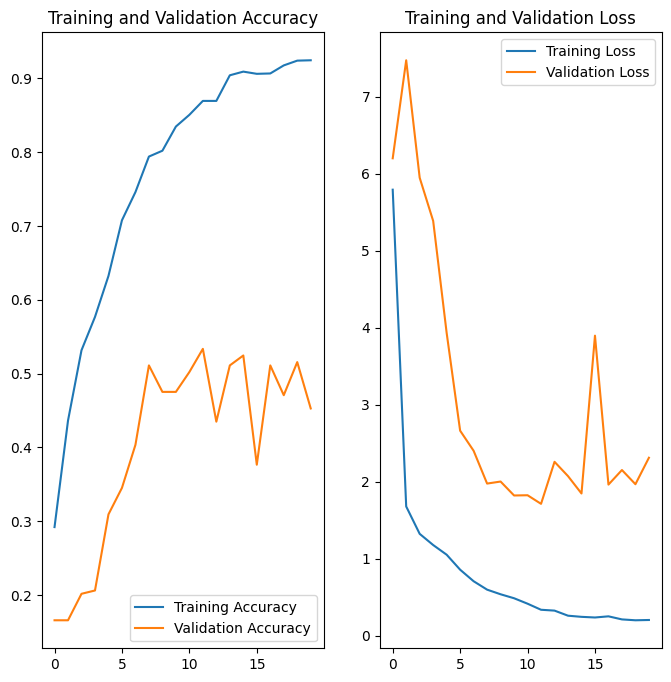

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
**There is overfit since there is a huge difference between the training accuracy and validation accuracy**

In [20]:
#
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation = Sequential([
    RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.1)
])

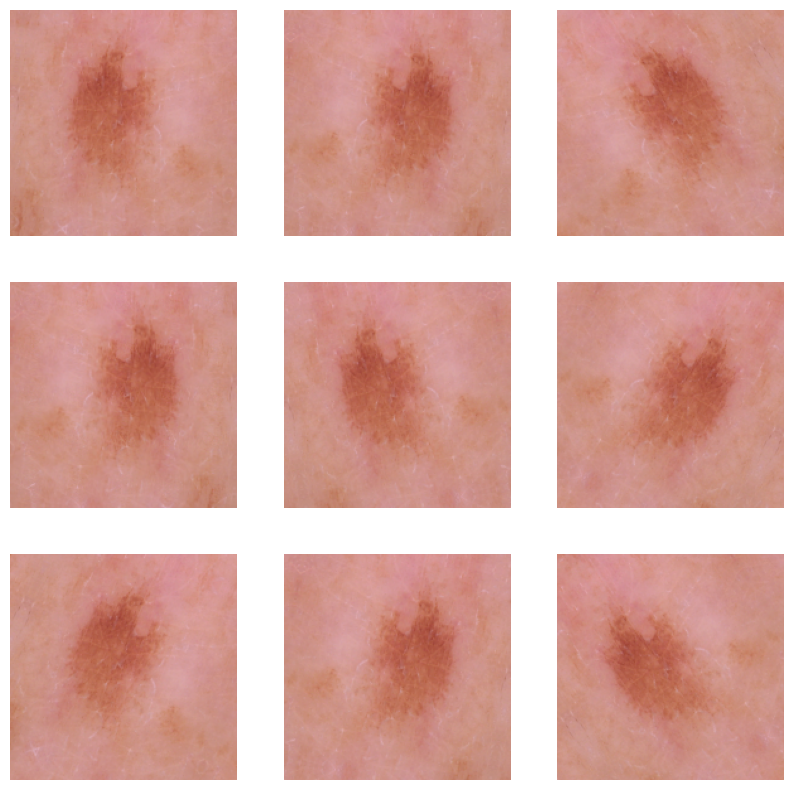

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(img_height, img_width,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


### Compiling the model

In [23]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds,validation_data=test_ds,epochs=epochs)

Epoch 1/20
63/63 [==============================] - 12s 186ms/step - loss: 1.9726 - accuracy: 0.3710 - val_loss: 5.2126 - val_accuracy: 0.1794
Epoch 2/20
63/63 [==============================] - 11s 181ms/step - loss: 1.6880 - accuracy: 0.4147 - val_loss: 4.6437 - val_accuracy: 0.1794
Epoch 3/20
63/63 [==============================] - 11s 181ms/step - loss: 1.5868 - accuracy: 0.4375 - val_loss: 4.6434 - val_accuracy: 0.2870
Epoch 4/20
63/63 [==============================] - 11s 179ms/step - loss: 1.4758 - accuracy: 0.4752 - val_loss: 3.7654 - val_accuracy: 0.2691
Epoch 5/20
63/63 [==============================] - 10s 165ms/step - loss: 1.4392 - accuracy: 0.4990 - val_loss: 2.8692 - val_accuracy: 0.4036
Epoch 6/20
63/63 [==============================] - 10s 164ms/step - loss: 1.3864 - accuracy: 0.5074 - val_loss: 2.3733 - val_accuracy: 0.3901
Epoch 7/20
63/63 [==============================] - 10s 166ms/step - loss: 1.3415 - accuracy: 0.5124 - val_loss: 2.0930 - val_accuracy: 0.4843

### Visualizing the results

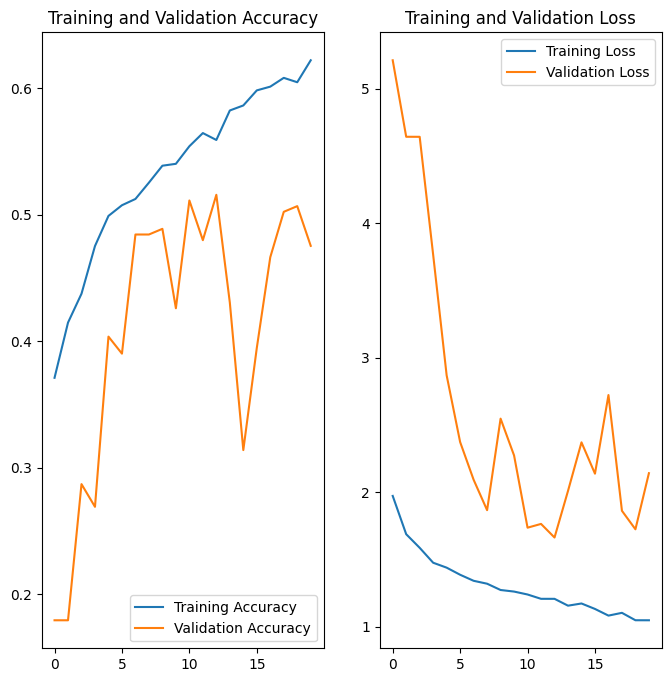

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**After the data augmentation, the difference between the training accuracy and validation accuracy is lower compared to how it was earlier**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
dict1 = {}

for images, labels in plt_ds:
    for i in range(len(class_names)):
        if class_names[labels[i]] in dict1:
          dict1[class_names[labels[i]]]+=1
        else:
          dict1[class_names[labels[i]]]=1
    print(dict1)

{'vascular lesion': 1, 'nevus': 1, 'pigmented benign keratosis': 3, 'melanoma': 1, 'dermatofibroma': 1, 'actinic keratosis': 1, 'basal cell carcinoma': 1}
{'vascular lesion': 1, 'nevus': 5, 'pigmented benign keratosis': 4, 'melanoma': 2, 'dermatofibroma': 1, 'actinic keratosis': 2, 'basal cell carcinoma': 1, 'seborrheic keratosis': 2}
{'vascular lesion': 1, 'nevus': 7, 'pigmented benign keratosis': 5, 'melanoma': 7, 'dermatofibroma': 1, 'actinic keratosis': 2, 'basal cell carcinoma': 1, 'seborrheic keratosis': 2, 'squamous cell carcinoma': 1}
{'vascular lesion': 1, 'nevus': 7, 'pigmented benign keratosis': 11, 'melanoma': 9, 'dermatofibroma': 2, 'actinic keratosis': 2, 'basal cell carcinoma': 1, 'seborrheic keratosis': 2, 'squamous cell carcinoma': 1}
{'vascular lesion': 1, 'nevus': 8, 'pigmented benign keratosis': 11, 'melanoma': 14, 'dermatofibroma': 3, 'actinic keratosis': 2, 'basal cell carcinoma': 1, 'seborrheic keratosis': 2, 'squamous cell carcinoma': 3}
{'vascular lesion': 1, '

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples? - **dermatofibroma**
#### - Which classes dominate the data in terms proportionate number of samples? **pigmented benign keratosis**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset='/content/gdrive/My Drive/CNN_assignment/dataset/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E5A1070D8D0>: 100%|██████████| 500/500 [00:19<00:00, 25.37 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E5A047C3A30>: 100%|██████████| 500/500 [00:18<00:00, 27.34 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E5A101E13C0>: 100%|██████████| 500/500 [00:17<00:00, 27.81 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E5A10283910>: 100%|██████████| 500/500 [01:30<00:00,  5.51 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E5A1023CB80>: 100%|██████████| 500/500 [01:20<00:00,  6.22 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E5B1AC32D10>: 100%|██████████| 500/500 [00:18<00:00, 27.23 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E5A108B0040>: 100%|██████████| 500/500 [00:40<00:00, 12.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E5A10A5FB50>: 100%|██████████| 500/500 [00:18<00:00, 26.42 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E5A0472A110>: 100%|██████████| 500/500 [00:18<00:00, 27.62 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/CNN_assignment/dataset/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025915.jpg_01a7dafc-cde5-41e1-bd68-6da6067f6f7c.jpg',
 '/content/gdrive/My Drive/CNN_assignment/dataset/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024786.jpg_f69870f0-7087-42ea-86bd-63c7afb51439.jpg',
 '/content/gdrive/My Drive/CNN_assignment/dataset/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027006.jpg_2b747767-9474-46d9-9a6e-34e143caca98.jpg',
 '/content/gdrive/My Drive/CNN_assignment/dataset/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027710.jpg_10ed0ae9-91c4-4fde-b4dc-42215114bb8b.jpg',
 '/content/gdrive/My Drive/CNN_assignment/dataset/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025389.jpg_8ada3019-a735-46a4-bfe9-e7b7963ef7f3.jpg',
 '/content/gdrive/My Drive/CNN_assignment/dataset/Train/pigmented beni

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [ ]:
#new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [42]:

data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/dataset/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [44]:
## your code goes here
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(img_height, img_width,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [45]:
## your code goes here
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [46]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30
169/169 [==============================] - 50s 272ms/step - loss: 3.4952 - accuracy: 0.2949 - val_loss: 4.8221 - val_accuracy: 0.1656
Epoch 2/30
169/169 [==============================] - 47s 268ms/step - loss: 1.6311 - accuracy: 0.3958 - val_loss: 3.3359 - val_accuracy: 0.3118
Epoch 3/30
169/169 [==============================] - 45s 258ms/step - loss: 1.5135 - accuracy: 0.4251 - val_loss: 3.8557 - val_accuracy: 0.2814
Epoch 4/30
169/169 [==============================] - 46s 263ms/step - loss: 1.4303 - accuracy: 0.4655 - val_loss: 2.0303 - val_accuracy: 0.4269
Epoch 5/30
169/169 [==============================] - 46s 261ms/step - loss: 1.3585 - accuracy: 0.4852 - val_loss: 1.4802 - val_accuracy: 0.5189
Epoch 6/30
169/169 [==============================] - 48s 279ms/step - loss: 1.3294 - accuracy: 0.4991 - val_loss: 1.2470 - val_accuracy: 0.5620
Epoch 7/30
169/169 [==============================] - 45s 258ms/step - loss: 1.2706 - accuracy: 0.5213 - val_loss: 1.4596 - val_ac

#### **Todo:**  Visualize the model results

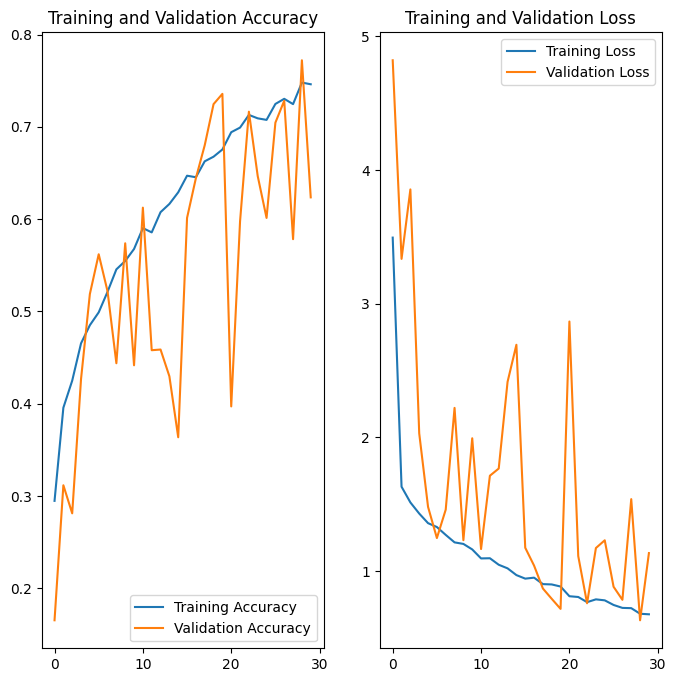

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
## Overfitting doesn't exist anymore as the difference between training accuracy and Validation accuracy is minimal
## Class rebalance helped. The accuracy is also better compared to the ones earlier